In [24]:


import pandas as pd
import numpy as np
import os
import logging

# Setup logging
logging.basicConfig(
    filename="../logs/cleaning.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="w"
)
logger = logging.getLogger()



In [25]:

data_path = r"C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_clean.csv"
df = pd.read_csv(data_path)
logger.info(f"Loaded processed dataset from {data_path} with shape {df.shape}")
df.head()


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
4,Abacavir,Abacavir Sulfate,5,Overall,10110328.45,3316293.0,42629.0,6085.0,3.482725,237.170200,...,5287295.41,1648593.0,19632,2809.0,3.594357,269.320263,1882.269637,0.0,-0.071481,0.007919


In [26]:

profile = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing %": df.isnull().mean() * 100,
    "Unique Values": df.nunique()
})
logger.info(f"Dataset profiling completed:\n{profile}")
profile

,Data Type,Missing %,Unique Values
Brnd_Name,object,0.000000,3474
Gnrc_Name,object,0.000000,1938
Tot_Mftr,int64,0.000000,36
Mftr_Name,object,0.000000,962
Tot_Spndng_2019,float64,29.387099,8120
Tot_Dsg_Unts_2019,float64,29.387099,8032
Tot_Clms_2019,float64,29.387099,6494
Tot_Benes_2019,float64,29.995108,5760
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,float64,29.387099,8120
Avg_Spnd_Per_Clm_2019,float64,29.387099,8120


In [27]:
# ### Step 2: Handle Missing Values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Median imputation for yearly numeric columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        logger.info(f"Imputed missing values in {col} with median: {median_val}")

# Forward/Backward fill for growth metrics
growth_cols = [col for col in df.columns if 'CAGR' in col or 'Chg_' in col]
df[growth_cols] = df[growth_cols].fillna(method='ffill').fillna(method='bfill')

logger.info("Completed missing value imputation for numeric columns.")
df.head()


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
4,Abacavir,Abacavir Sulfate,5,Overall,10110328.45,3316293.0,42629.0,6085.0,3.482725,237.170200,...,5287295.41,1648593.0,19632,2809.0,3.594357,269.320263,1882.269637,0.0,-0.071481,0.007919


In [28]:
# Profile columns
profile = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing %": df.isnull().mean() * 100,
    "Unique Values": df.nunique()
})
logger.info(f"Dataset profiling completed:\n{profile}")
profile

,Data Type,Missing %,Unique Values
Brnd_Name,object,0.0,3474
Gnrc_Name,object,0.0,1938
Tot_Mftr,int64,0.0,36
Mftr_Name,object,0.0,962
Tot_Spndng_2019,float64,0.0,8121
Tot_Dsg_Unts_2019,float64,0.0,8033
Tot_Clms_2019,float64,0.0,6495
Tot_Benes_2019,float64,0.0,5760
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,float64,0.0,8121
Avg_Spnd_Per_Clm_2019,float64,0.0,8121


In [29]:
import numpy as np

# Step 1: Validate & Convert Data Types
logger.info("Validating and converting data types...")

# Convert all numeric columns (except Outlier_Flag) to float
numeric_cols = [col for col in df.columns if any(x in col for x in ['Spndng', 'Dsg_Unts', 'Clms', 'Benes', 'Avg_Spnd', 'CAGR', 'Chg_Avg']) and 'Outlier' not in col]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert Outlier_Flag columns to boolean
outlier_cols = [col for col in df.columns if "Outlier_Flag" in col]
for col in outlier_cols:
    df[col] = df[col].apply(lambda x: True if x == 1 else False)

# Log the updated data types
logger.info(f"Updated data types: \n{df.dtypes}")

# Display sample
df[outlier_cols + numeric_cols[:5]].head()


,Outlier_Flag_2019,Outlier_Flag_2020,Outlier_Flag_2021,Outlier_Flag_2022,Outlier_Flag_2023,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019
0,False,False,False,False,False,139201.68,642471.0,5392.0,1878.0,0.216788
1,False,False,False,False,False,139201.68,642471.0,5392.0,1878.0,0.216788
2,False,False,False,False,False,343031.42,1830596.0,14581.0,5319.0,0.187389
3,False,False,False,False,False,343031.42,1830596.0,14581.0,5319.0,0.187389
4,False,False,False,False,False,10110328.45,3316293.0,42629.0,6085.0,3.482725


In [30]:
for col in outlier_cols:
    print(col, df[col].value_counts(dropna=False))


Outlier_Flag_2019 Outlier_Flag_2019
False    13538
True       771
Name: count, dtype: int64
Outlier_Flag_2020 Outlier_Flag_2020
False    13424
True       885
Name: count, dtype: int64
Outlier_Flag_2021 Outlier_Flag_2021
False    13227
True      1082
Name: count, dtype: int64
Outlier_Flag_2022 Outlier_Flag_2022
False    13008
True      1301
Name: count, dtype: int64
Outlier_Flag_2023 Outlier_Flag_2023
False    12437
True      1872
Name: count, dtype: int64


# Outlier Detection & Handling 

In [31]:
# ### Step: Detect Outliers Before Capping

def detect_outliers(df, columns):
    """Return a DataFrame listing outliers for each selected column."""
    outlier_records = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        for idx, row in outliers.iterrows():
            outlier_records.append({
                'Column': col,
                'Index': idx,
                'Value': row[col],
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
    return pd.DataFrame(outlier_records)




In [32]:
# Detect outliers for spending & claims columns
outliers_df = detect_outliers(df, cap_columns)

# Display summary
print(f"Total outliers detected: {len(outliers_df)} across {len(cap_columns)} columns")
outliers_df.head(20)  # Show first 20 for preview

Total outliers detected: 88877 across 37 columns


,Column,Index,Value,Lower_Bound,Upper_Bound
0,Tot_Spndng_2019,10,1.305714e+07,-6129859.06,11211754.14
1,Tot_Spndng_2019,15,2.685463e+07,-6129859.06,11211754.14
2,Tot_Spndng_2019,16,2.685463e+07,-6129859.06,11211754.14
3,Tot_Spndng_2019,19,4.220386e+08,-6129859.06,11211754.14
4,Tot_Spndng_2019,20,4.220386e+08,-6129859.06,11211754.14
5,Tot_Spndng_2019,23,2.815030e+08,-6129859.06,11211754.14
6,Tot_Spndng_2019,25,8.962466e+07,-6129859.06,11211754.14
7,Tot_Spndng_2019,27,1.536609e+07,-6129859.06,11211754.14
8,Tot_Spndng_2019,34,2.063578e+07,-6129859.06,11211754.14
9,Tot_Spndng_2019,35,2.038645e+07,-6129859.06,11211754.14


In [33]:
for col in cap_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Min={df[col].min()}, Max={df[col].max()}, Lower={lower_bound}, Upper={upper_bound}")


Tot_Spndng_2019: Min=57.16, Max=7304981235.0, Lower=-6129859.060000001, Upper=11211754.14
Tot_Dsg_Unts_2019: Min=0.7, Max=3830648072.0, Lower=-1931448.0, Upper=3497832.0
Tot_Clms_2019: Min=11.0, Max=50532357.0, Lower=-32892.0, Upper=60324.0
Tot_Benes_2019: Min=11.0, Max=12985551.0, Lower=-11028.0, Upper=20516.0
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019: Min=0.000232362, Max=40190.06468, Lower=-6.5082073345, Upper=12.947505437499998
Avg_Spnd_Per_Clm_2019: Min=0.037374513, Max=207457.7468, Lower=-253.58101634999997, Upper=549.5523982899999
Avg_Spnd_Per_Bene_2019: Min=0.11325645, Max=1224586.723, Lower=-665.3518152500001, Upper=1438.21421955
Tot_Spndng_2020: Min=57.11, Max=9936069814.0, Lower=-7262254.844999999, Upper=12717127.355
Tot_Dsg_Unts_2020: Min=12.5, Max=4084434090.0, Lower=-2283011.3275, Upper=3959541.1965
Tot_Clms_2020: Min=11.0, Max=55581508.0, Lower=-39665.0, Upper=69439.0
Tot_Benes_2020: Min=11.0, Max=13875265.0, Lower=-13148.0, Upper=23268.0
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020: Min=0.000

In [34]:
def detect_outliers_strict(df, columns, multiplier=1.0):
    outlier_records = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        for idx, row in outliers.iterrows():
            outlier_records.append({'Column': col, 'Index': idx, 'Value': row[col]})
    return pd.DataFrame(outlier_records)

outliers_df = detect_outliers_strict(df, cap_columns, multiplier=1.0)
print(f"Outliers detected with stricter rule: {len(outliers_df)}")


Outliers detected with stricter rule: 99165


In [35]:
# Create a summary of outliers per column
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
outlier_summary_df.sort_values(by='Outlier Count', ascending=False)


,Outlier Count
Tot_Clms_2019,2712
Tot_Dsg_Unts_2019,2693
Tot_Benes_2019,2686
Tot_Dsg_Unts_2020,2633
Tot_Benes_2020,2626
Tot_Benes_2021,2610
Avg_Spnd_Per_Bene_2019,2606
Tot_Clms_2020,2601
Tot_Dsg_Unts_2021,2594
Tot_Clms_2021,2569


# Cap the outliers (Winsorization)

In [36]:

def cap_outliers(df, columns, multiplier=1.0):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

df = cap_outliers(df, cap_columns, multiplier=1.0)
logger.info("Outliers capped using 1.0×IQR.")


In [37]:
output_file = r"C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_capped.csv"
df.to_csv(output_file, index=False)
logger.info(f"Saved cleaned & capped dataset to {output_file}")
print(f"Cleaned dataset saved to {output_file}")


Cleaned dataset saved to C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_capped.csv


# BEFORE AND AFTER WINZORIZATION FOR TOP 5 COLUMNS WITH MOST OUTLIERS

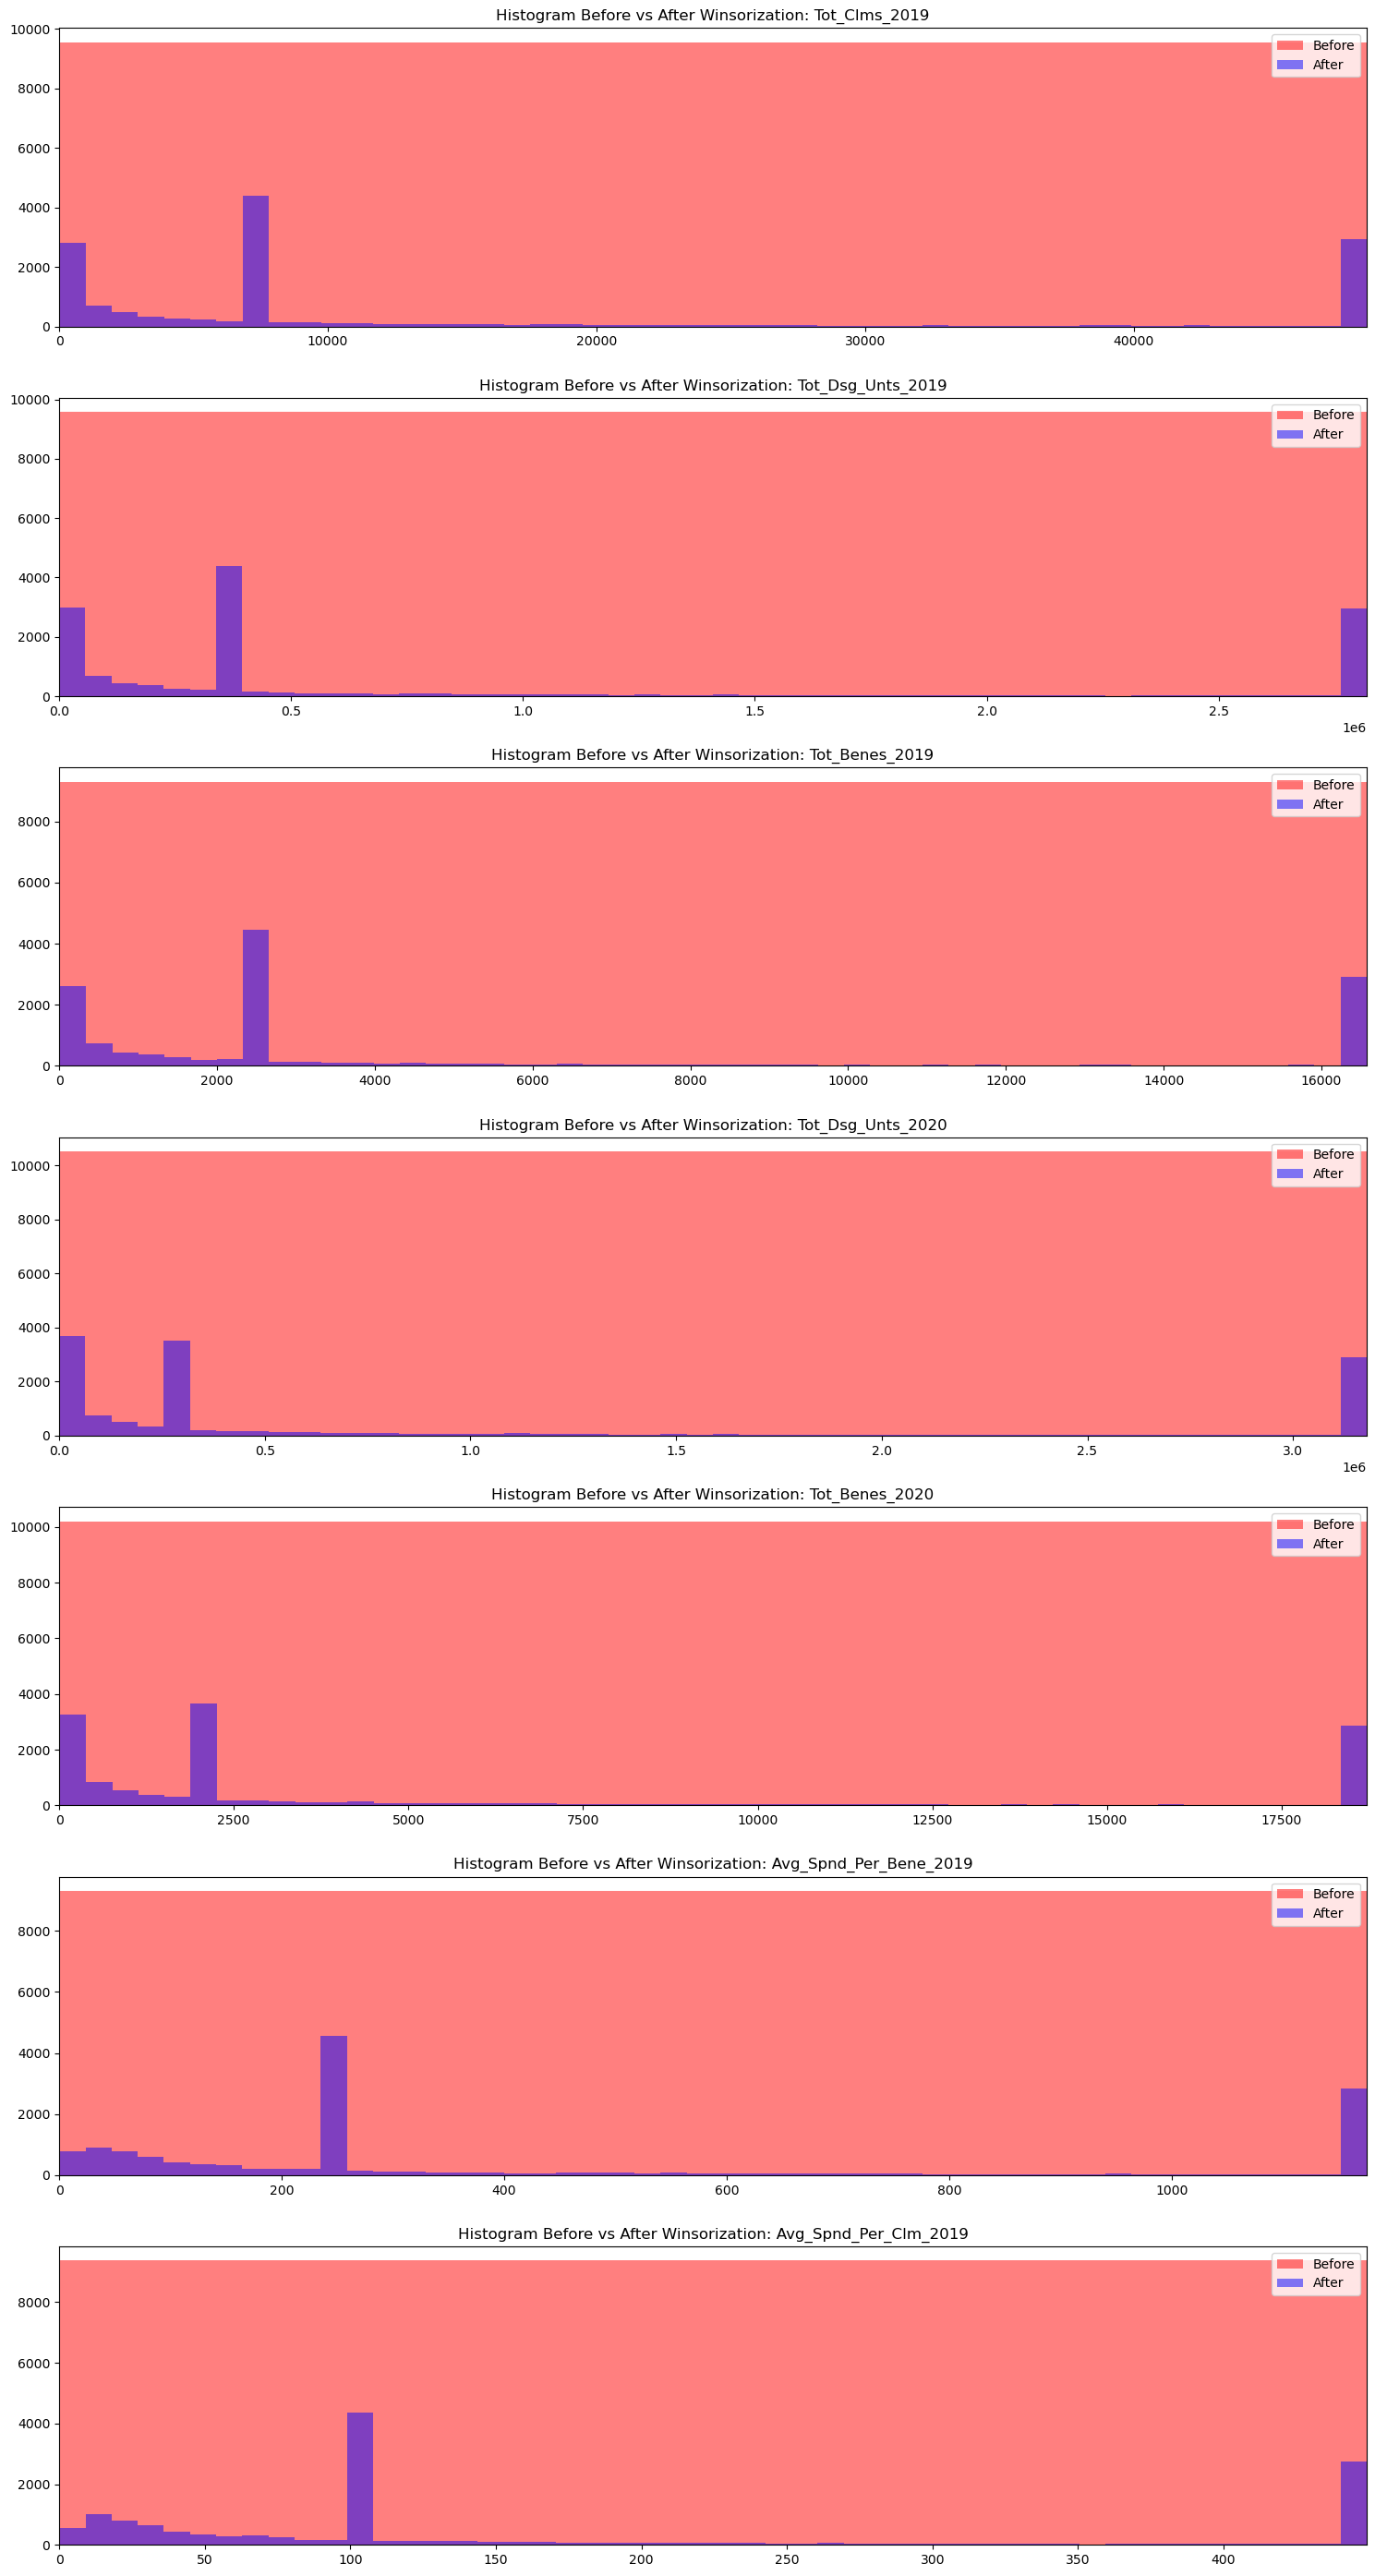

In [41]:
import matplotlib.pyplot as plt

cols_to_plot = [
    'Tot_Clms_2019', 'Tot_Dsg_Unts_2019', 'Tot_Benes_2019',
    'Tot_Dsg_Unts_2020', 'Tot_Benes_2020',
    'Avg_Spnd_Per_Bene_2019', 'Avg_Spnd_Per_Clm_2019'
]

plt.figure(figsize=(15, 4 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    plt.subplot(len(cols_to_plot), 1, i + 1)
    plt.hist(df_before[col].dropna(), bins=50, alpha=0.5, label="Before", color='red')
    plt.hist(df_after[col].dropna(), bins=50, alpha=0.5, label="After", color='blue')
    plt.xlim(0, df_after[col].quantile(0.99))  
    plt.title(f"Histogram Before vs After Winsorization: {col}")
    plt.legend()

plt.tight_layout()
plt.show()


* We detected 99,165 outliers across 37 key numerical columns.

* The highest concentration of outliers is in claim, dosage, and beneficiary counts (e.g., Tot_Clms_2019, Tot_Dsg_Unts_2019, Tot_Benes_2019) and per-beneficiary spending columns.

* Spending-related fields like Tot_Spndng_2019–2023 and Avg_Spnd_Per_Dsg_Unt_Wghtd_20XX also show significant outlier presence, indicating extreme variability in drug pricing and utilization.

* These outliers are likely due to drugs with exceptionally high usage or cost (e.g., specialty medications or those with very low claim volumes but high unit prices).